In [2]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB



Plotting difference between home and away for a few key data points to see if there is a noticable difference 

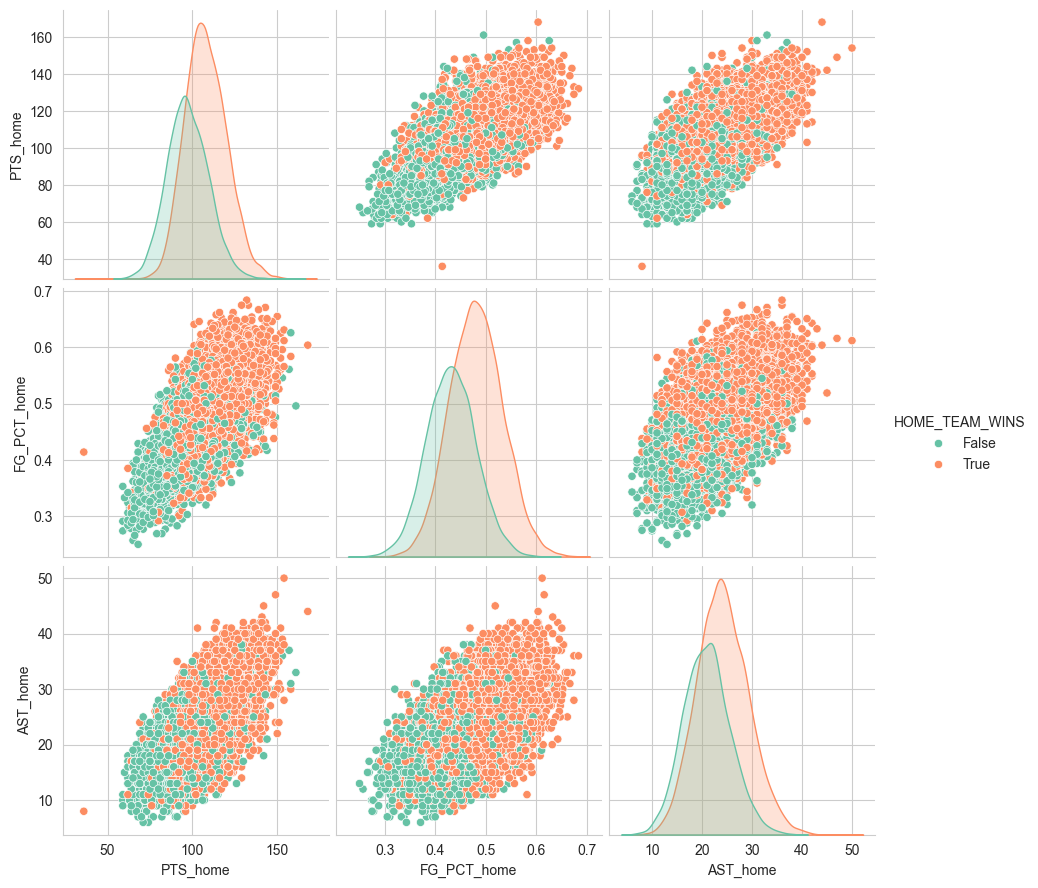

In [3]:
sns.set_style("whitegrid")

#read in data from csv's
games = pd.read_csv('Data/games.csv')
ranking = pd.read_csv('Data/ranking.csv')
teams= pd.read_csv('Data/teams.csv')

#clean data
games['HOME_TEAM_WINS'] = games['HOME_TEAM_WINS'].astype(bool)

sns.pairplot(
    games[["PTS_home", "FG_PCT_home", "AST_home", "HOME_TEAM_WINS"]],
    hue = "HOME_TEAM_WINS",
    height = 3,
    palette = "Set2")


Data pre processing

In [4]:
#selecting needed columns
df = games[['FG_PCT_home','FT_PCT_home','FG3_PCT_home','AST_home','REB_home','FG_PCT_away','FT_PCT_away','FG3_PCT_away','AST_away','REB_away','HOME_TEAM_WINS']]
df.head(5)

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,44.0,True
1,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,37.0,True
2,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,46.0,True
3,0.441,0.909,0.297,27.0,49.0,0.392,0.735,0.261,15.0,46.0,True
4,0.429,1.000,0.378,22.0,47.0,0.500,0.773,0.292,20.0,47.0,False


In [5]:
#remove rows with null
df=df.dropna()

In [6]:
y = df['HOME_TEAM_WINS']
X = df.drop('HOME_TEAM_WINS', axis = 1)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.80, 
    random_state = 1)

In [8]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LinearSVC', LinearSVC()))
models.append(('SVC', SVC()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))



In [9]:
results = []
names = []

for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())


c:\Users\bendo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bendo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LogisticRegression 0.8368721394698048
LinearSVC 0.7662074991269971
SVC 0.7468103617250055
KNeighborsClassifier 0.7101361206124132
DecisionTreeClassifier 0.7642766005205835
GaussianNB 0.8341416221920627


In [10]:
lr = LogisticRegression()
lsvc = LinearSVC()


In [11]:
lr.fit(X_train,y_train)
lr.score(X_test, y_test).round(3)


c:\Users\bendo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.841

In [12]:
lsvc.fit(X_train,y_train)
lsvc.score(X_test, y_test).round(3)

c:\Users\bendo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\bendo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.844

In [16]:
y_pred = lr.predict_proba(X_test)

In [17]:
y_pred

array([[0.15078321, 0.84921679],
       [0.72507498, 0.27492502],
       [0.01054785, 0.98945215],
       ...,
       [0.87930584, 0.12069416],
       [0.99753338, 0.00246662],
       [0.81329339, 0.18670661]])

In [14]:
import pickle

filename = 'LogisticRegression.sav'
pickle.dump(lr, open(filename, 'wb')) 

In [15]:
filename = 'LinearSVC.sav'
pickle.dump(lsvc, open(filename, 'wb')) 